In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Dataset\Diabetic\diabetes_prediction.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
df.size

900000

In [6]:
df.shape

(100000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
cat=df.select_dtypes(include=['object']).columns
num=df.select_dtypes(exclude=['object']).columns

In [11]:
print('cat:',cat)
print('num:',num)

cat: Index(['gender', 'smoking_history'], dtype='object')
num: Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')


In [12]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [13]:
for i in cat:
    a=df[i].unique()
    print(i,a)
    

gender ['Female' 'Male' 'Other']
smoking_history ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [14]:
for i in cat:
    a=df[i].nunique()
    print(i,a)

gender 3
smoking_history 6


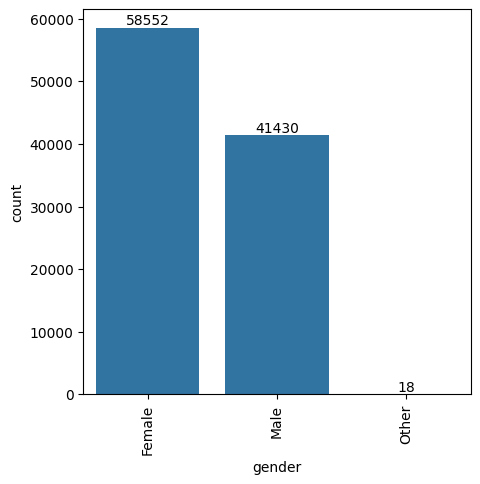

In [15]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df['gender'])
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 
plt.show()

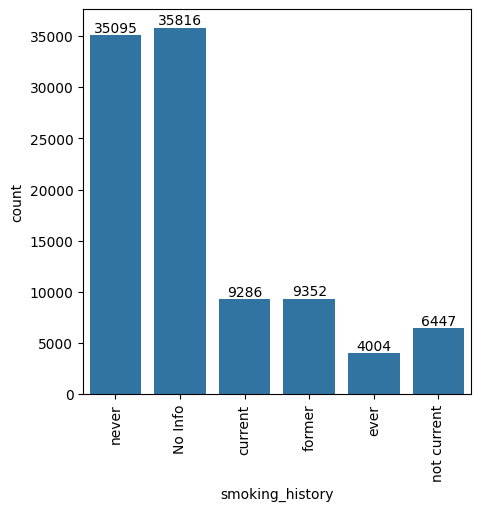

In [16]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df['smoking_history'])
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 
plt.show()

In [17]:
cat

Index(['gender', 'smoking_history'], dtype='object')

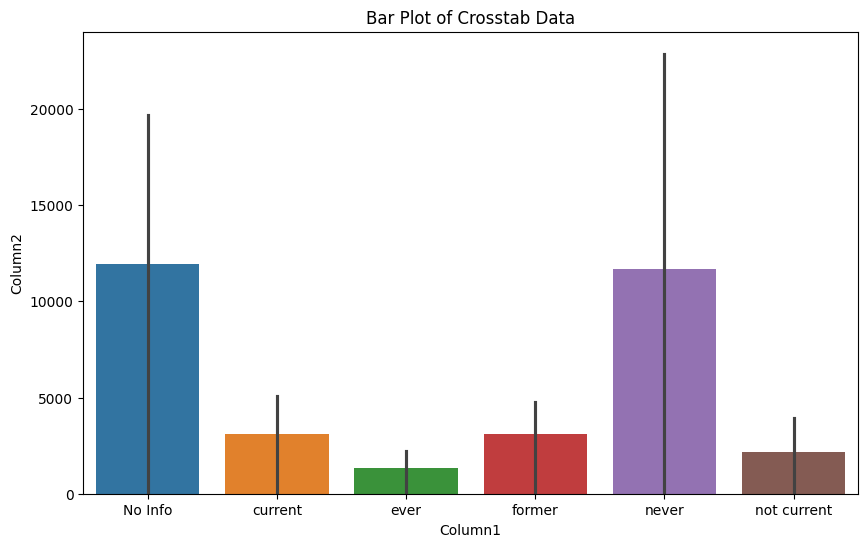

In [18]:
col1=df['gender']
col2=df['smoking_history']
res=pd.crosstab(col1,col2)
plt.figure(figsize=(10, 6))
sns.barplot(data=res)

# Optional: Customize the plot as needed
plt.title('Bar Plot of Crosstab Data')
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.show()

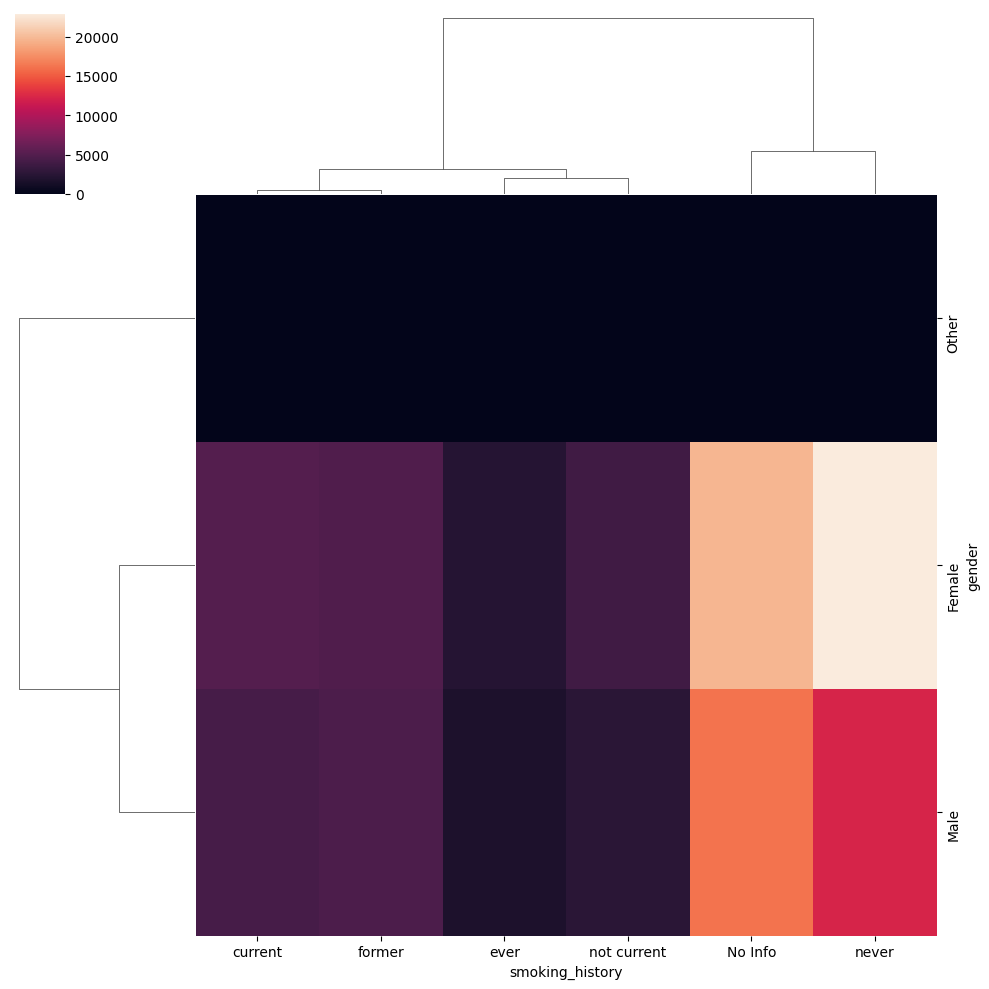

In [19]:
pd.crosstab(df['gender'],df['smoking_history'])
sns.clustermap(pd.crosstab(df['gender'],df['smoking_history']))
plt.show()

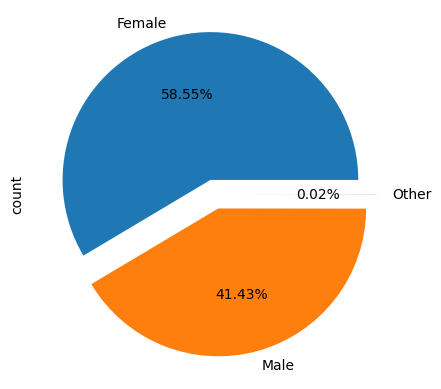

In [20]:
df['gender'].value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0.1,0.1,0.1])
plt.show()

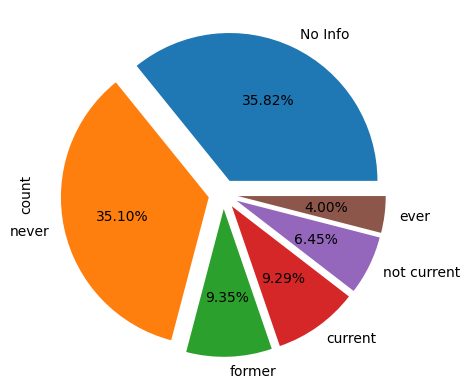

In [21]:
df['smoking_history'].value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0.1,0.1,0.1,0.1,0.1,0.1])
plt.show()

In [22]:
num

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

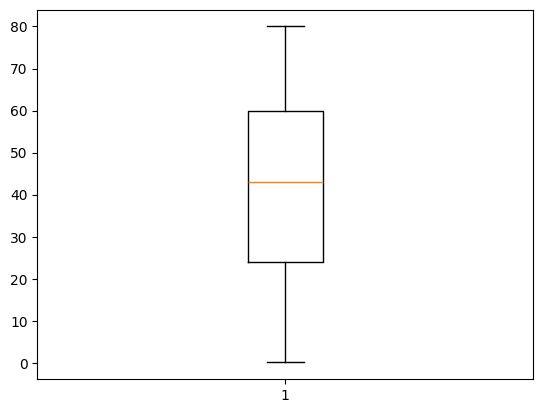

In [23]:
plt.boxplot(df['age'])
plt.show()
    

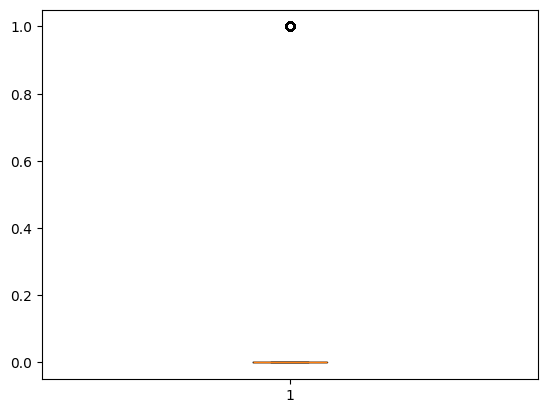

In [24]:
plt.boxplot(df['hypertension'])
plt.show()
    

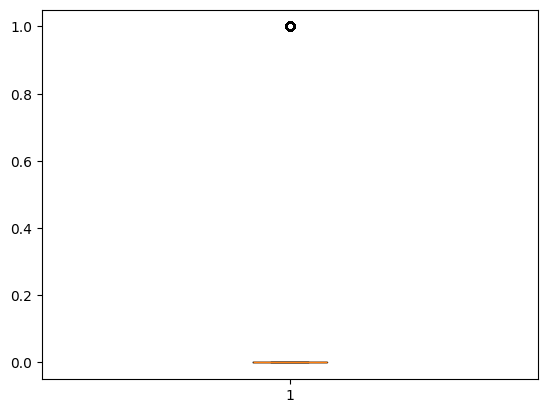

In [25]:
plt.boxplot(df['heart_disease'])
plt.show()

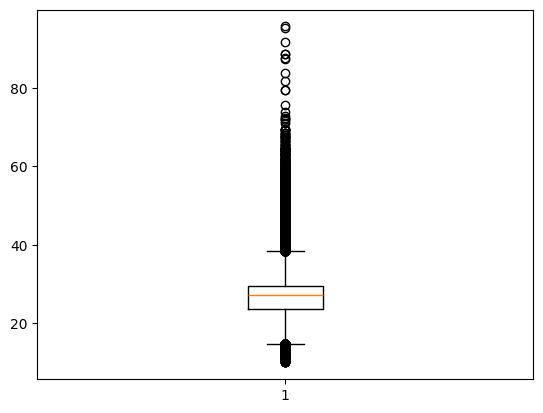

In [26]:
plt.boxplot(df['bmi'])
plt.show()

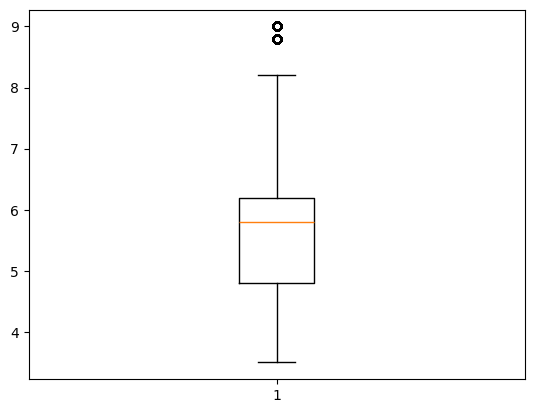

In [27]:
plt.boxplot(df['HbA1c_level'])
plt.show()

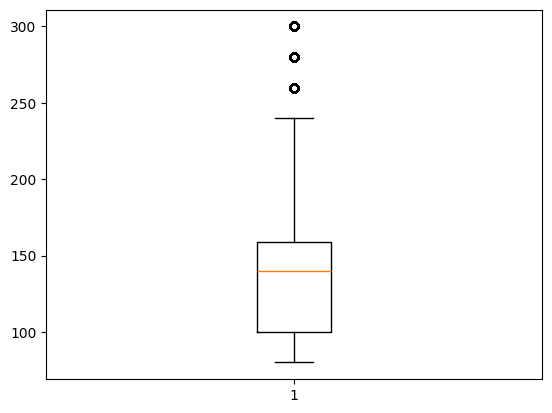

In [28]:
plt.boxplot(df['blood_glucose_level'])
plt.show()

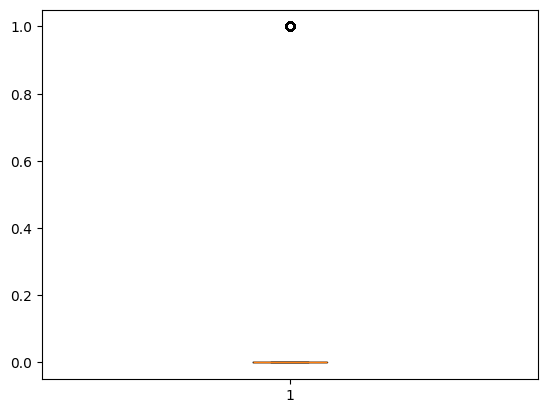

In [29]:
plt.boxplot(df['diabetes'])
plt.show()

<Axes: xlabel='hypertension', ylabel='Density'>

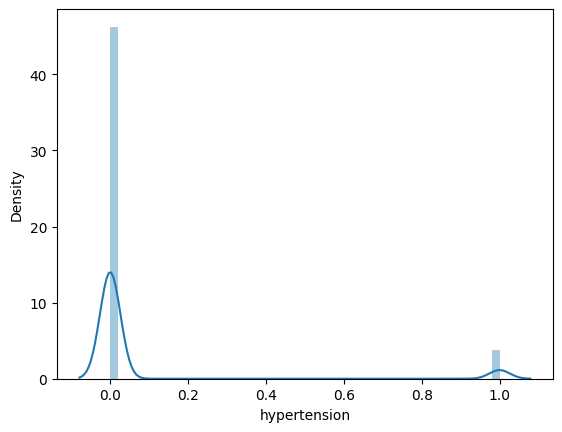

In [30]:
sns.distplot(df['hypertension'])

In [31]:
for i in num:
    a=df[i].skew()
    print(i,a)

age -0.05197899678256747
hypertension 3.2312957890610265
heart_disease 4.733871943500769
bmi 1.0438355183081105
HbA1c_level -0.0668537611478635
blood_glucose_level 0.8216549517517585
diabetes 2.9762170270940076


In [32]:
df['hypertension']=np.log1p(df['hypertension'])
df['hypertension'].skew()

3.2312957890610283

In [33]:
df['heart_disease']=np.log1p(df['heart_disease'])
df['heart_disease'].skew()

4.73387194350077

In [34]:
for i in num:
    a=df[i].skew()
    print(i,a)

age -0.05197899678256747
hypertension 3.2312957890610283
heart_disease 4.73387194350077
bmi 1.0438355183081105
HbA1c_level -0.0668537611478635
blood_glucose_level 0.8216549517517585
diabetes 2.9762170270940076


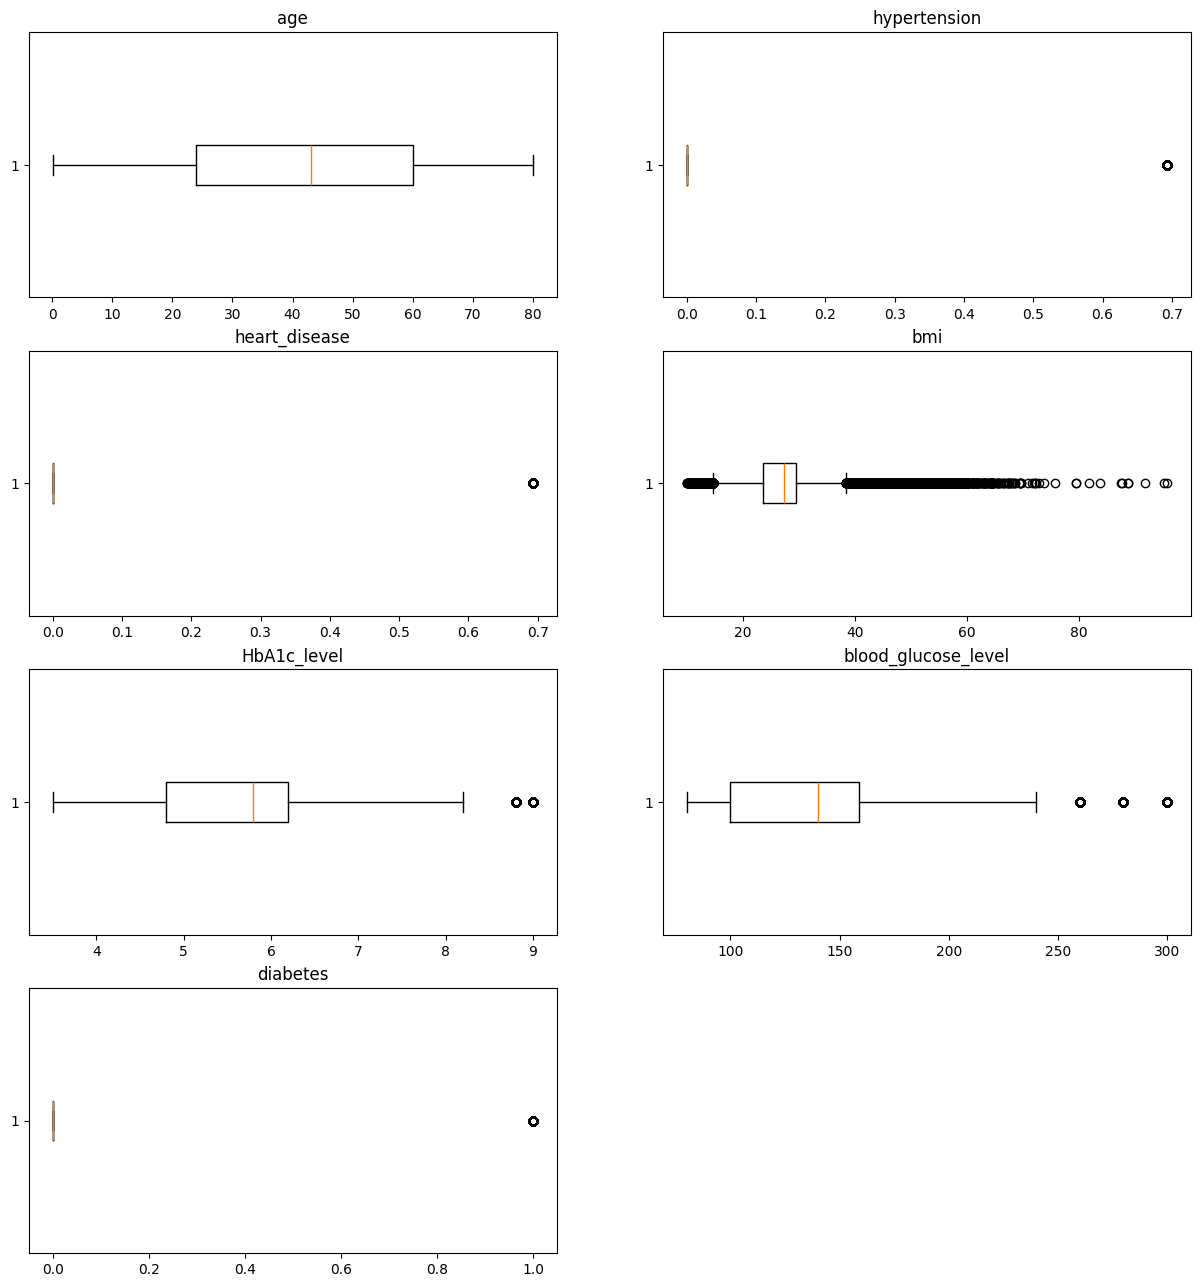

In [35]:
plt.figure(figsize=(15,20))
for i,column in enumerate(num):
    plt.subplot(5,2,i+1)
    plt.title(column)
    plt.boxplot(df[column],vert=False)
plt.show()
    

In [36]:
q1=np.quantile(df['bmi'],0.25)
q2=np.quantile(df['bmi'],0.50)
q3=np.quantile(df['bmi'],0.75)
Iqr=q3-q1
upper=q3+(1.5*Iqr)
lower=q1-(1.5*Iqr)
con1=df['bmi']>upper
con2=df['bmi']<lower
outliers=df['bmi'][con1|con2]
outliers_data1=outliers.values
len(outliers)

7086

In [37]:
df['bmi']=np.clip(df['bmi'],lower,upper)

In [38]:
q1=np.quantile(df['HbA1c_level'],0.25)
q2=np.quantile(df['HbA1c_level'],0.50)
q3=np.quantile(df['HbA1c_level'],0.75)
Iqr=q3-q1
upper1=q3+(1.5*Iqr)
lower1=q1-(1.5*Iqr)
con1=df['HbA1c_level']>upper1
con2=df['HbA1c_level']<lower1
outliers=df['HbA1c_level'][con1|con2]
outliers_data1=outliers.values
len(outliers)

1315

In [39]:
df['HbA1c_level']=np.clip(df['HbA1c_level'],lower1,upper1)

In [40]:
q1=np.quantile(df['blood_glucose_level'],0.25)
q2=np.quantile(df['blood_glucose_level'],0.50)
q3=np.quantile(df['blood_glucose_level'],0.75)
Iqr=q3-q1
upper2=q3+(1.5*Iqr)
lower2=q1-(1.5*Iqr)
con1=df['blood_glucose_level']>upper2
con2=df['blood_glucose_level']<lower2
outliers=df['blood_glucose_level'][con1|con2]
outliers_data1=outliers.values
len(outliers)


2038

In [41]:
df['blood_glucose_level']=np.clip(df['blood_glucose_level'],lower2,upper2)

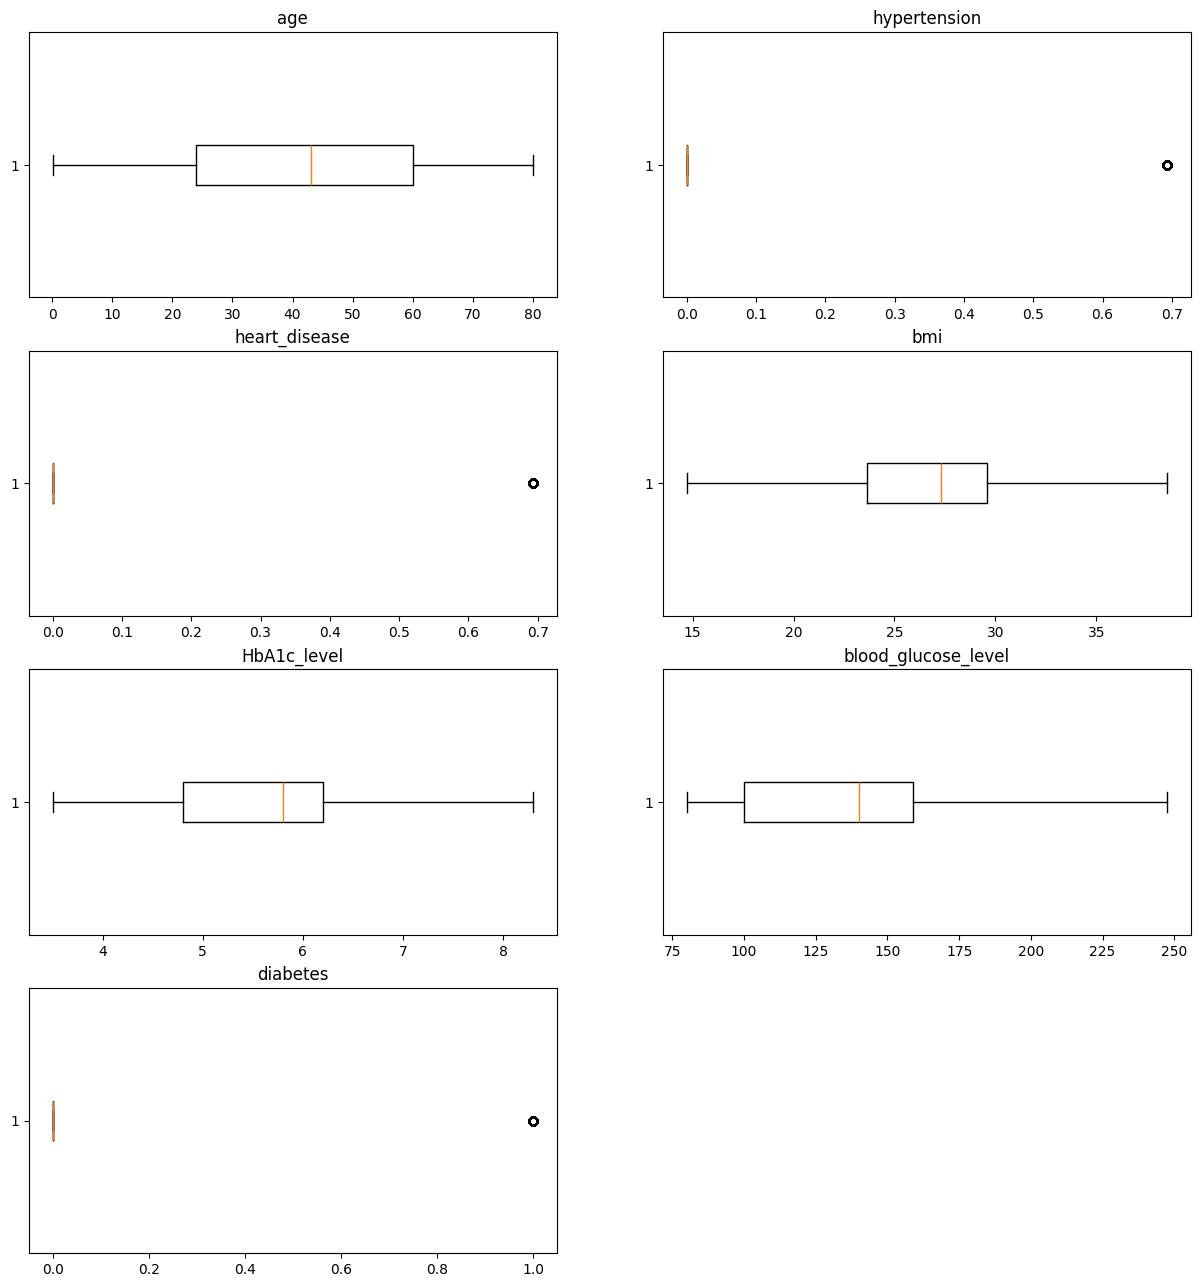

In [42]:
plt.figure(figsize=(15,20))
for i,column in enumerate(num):
    plt.subplot(5,2,i+1)
    plt.title(column)
    plt.boxplot(df[column],vert=False)
plt.show()
    

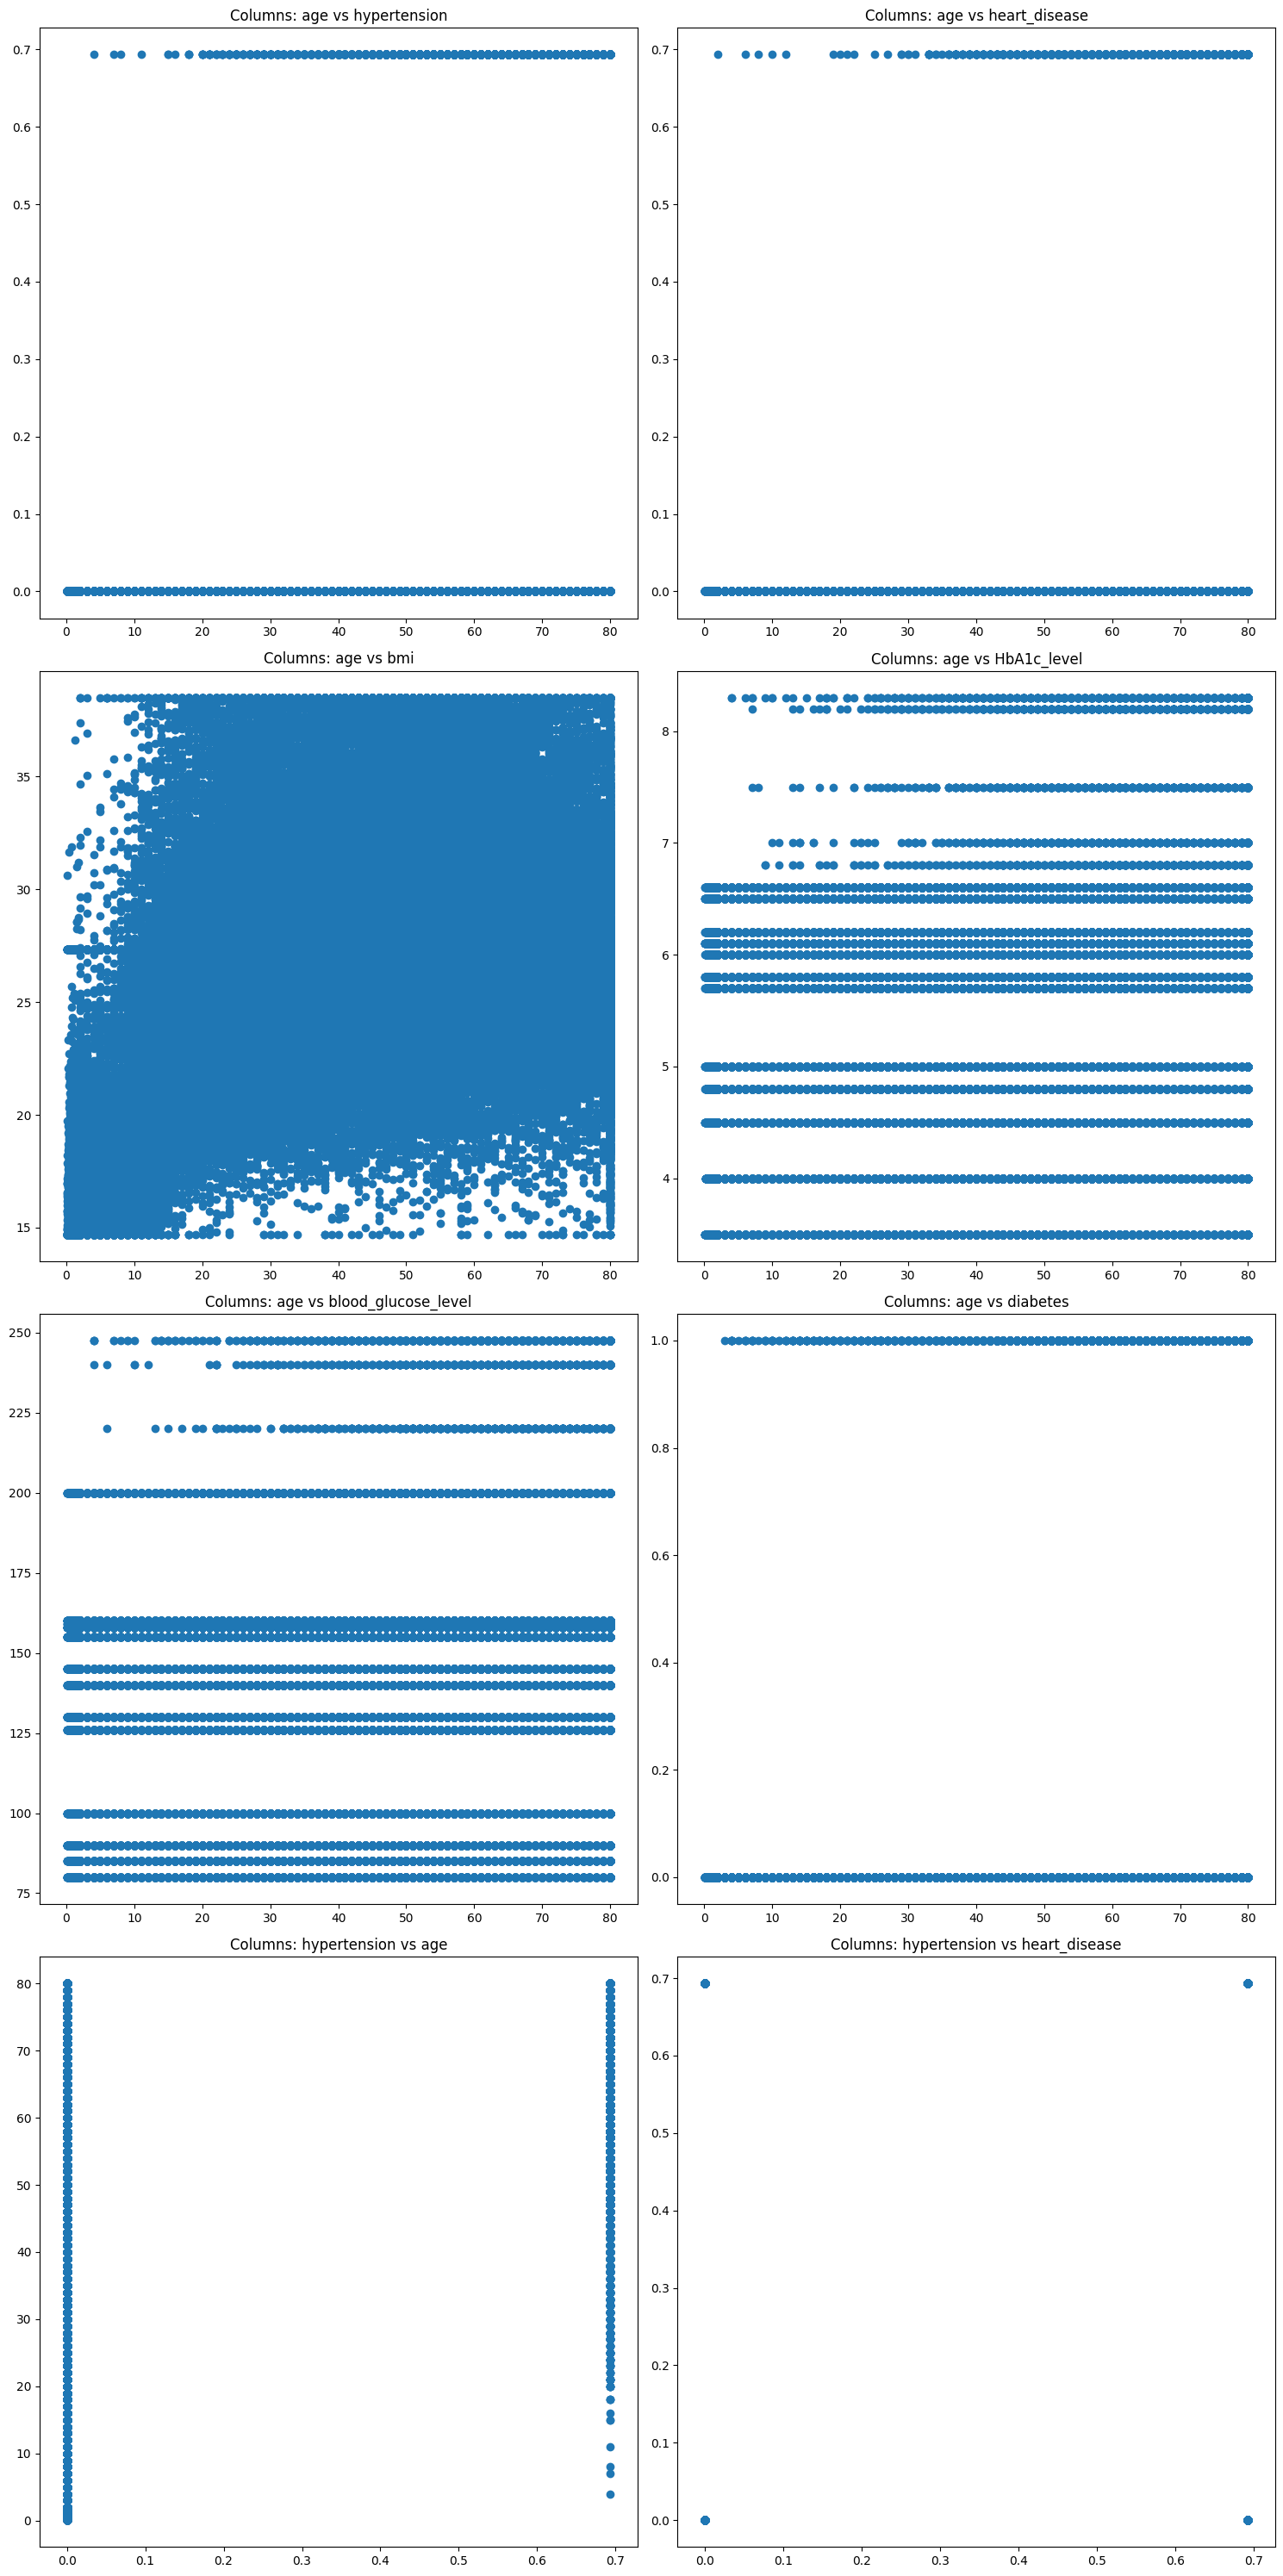

In [43]:
import matplotlib.pyplot as plt

# Calculate the total number of plots (rows * columns)
total_plots = 4 * 2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 30))  # 5 rows, 4 columns - Adjust the figsize as needed

# Your existing code with minor modifications
plot_counter = 0  # Initialize a counter for subplot positions

for i in num:
    for j in num:
        if i != j and plot_counter < total_plots:  # Check if plot_counter exceeds total_plots
            ax = axes[plot_counter // 2, plot_counter % 2]  # Get the current subplot
            ax.scatter(df[i], df[j])
            ax.set_title(f'Columns: {i} vs {j}')
            plot_counter += 1  # Increment the plot counter

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [44]:
corr=df.corr(numeric_only=True)
corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.380410,0.097098,0.102481,0.258008
hypertension,0.251171,1.000000,0.121262,0.151447,0.077573,0.078007,0.197823
heart_disease,0.233354,0.121262,1.000000,0.069390,0.064703,0.064398,0.171727
bmi,0.380410,0.151447,0.069390,1.000000,0.078333,0.083048,0.209656
HbA1c_level,0.097098,0.077573,0.064703,0.078333,1.000000,0.147483,0.384753
blood_glucose_level,0.102481,0.078007,0.064398,0.083048,0.147483,1.000000,0.386446
diabetes,0.258008,0.197823,0.171727,0.209656,0.384753,0.386446,1.000000


<Axes: >

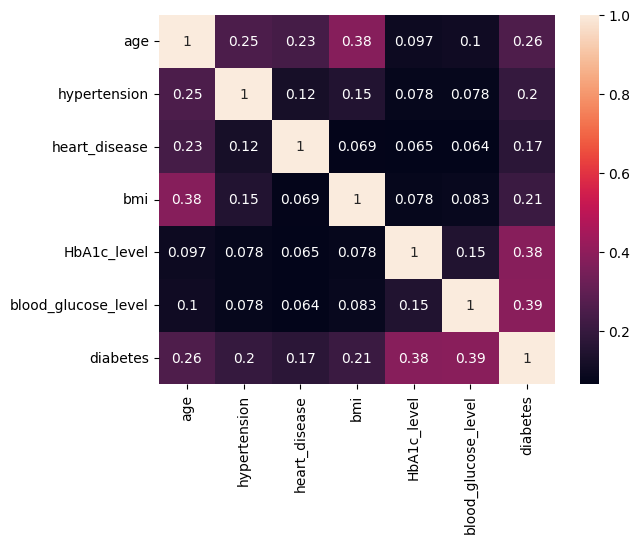

In [45]:
sns.heatmap(corr,annot=True)

In [46]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.000000,0.693147,never,25.19,6.6,140.0,0
1,Female,54.0,0.000000,0.000000,No Info,27.32,6.6,80.0,0
2,Male,28.0,0.000000,0.000000,never,27.32,5.7,158.0,0
3,Female,36.0,0.000000,0.000000,current,23.45,5.0,155.0,0
4,Male,76.0,0.693147,0.693147,current,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0.000000,0.000000,No Info,27.32,6.2,90.0,0
99996,Female,2.0,0.000000,0.000000,No Info,17.37,6.5,100.0,0
99997,Male,66.0,0.000000,0.000000,former,27.83,5.7,155.0,0
99998,Female,24.0,0.000000,0.000000,never,35.42,4.0,100.0,0


In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['smoking_history']=le.fit_transform(df['smoking_history'])

In [49]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0.000000,0.693147,4,25.19,6.6,140.0,0
1,0,54.0,0.000000,0.000000,0,27.32,6.6,80.0,0
2,1,28.0,0.000000,0.000000,4,27.32,5.7,158.0,0
3,0,36.0,0.000000,0.000000,1,23.45,5.0,155.0,0
4,1,76.0,0.693147,0.693147,1,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0.000000,0.000000,0,27.32,6.2,90.0,0
99996,0,2.0,0.000000,0.000000,0,17.37,6.5,100.0,0
99997,1,66.0,0.000000,0.000000,3,27.83,5.7,155.0,0
99998,0,24.0,0.000000,0.000000,4,35.42,4.0,100.0,0


In [50]:
X=df.drop('diabetes',axis=1)

In [51]:
y=df['diabetes']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100000, 9)
(80000, 8)
(20000, 8)
(80000,)
(20000,)


**Decision Tree**

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

**prediction**

In [56]:
y_pred_dt=dtree.predict(X_test)

In [57]:
sns.set_theme(color_codes=True)             
pd.set_option('display.max_columns', None)  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

**Metrices**

In [58]:
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

In [59]:
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

accuray is: 95.18
F1 is: 0.72
Precision is: 0.71
Recall is: 0.73
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18292
           1       0.71      0.73      0.72      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000



**Confusion Metrices**

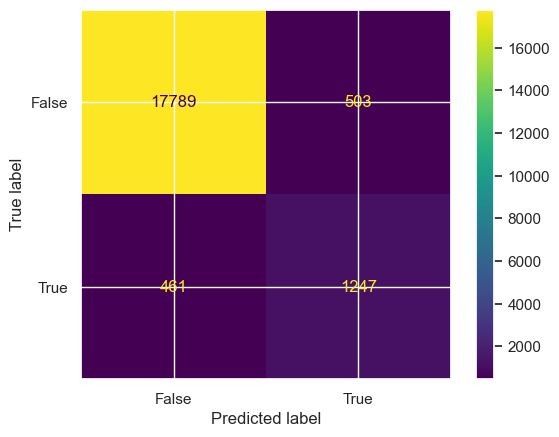

In [60]:
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [61]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 17789
False postive: 503
False negative: 461
True postive: 1247


**ROC-AUC Curve**

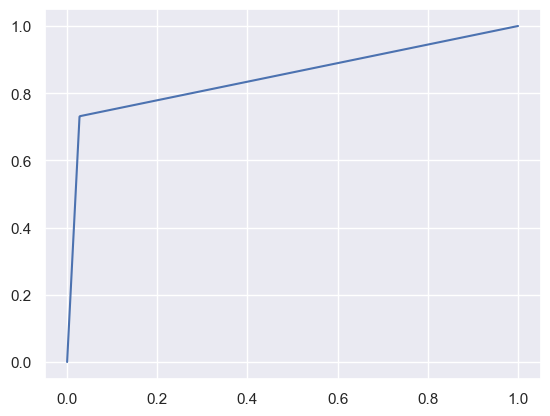

In [62]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

**LOgistic regression**

In [63]:
from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train,y_train)

LogisticRegression()

**Prediction**

In [64]:
y_pred_log=logtree.predict(X_test)

**Metrices**

In [65]:
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 94.62
F1 is: 0.63
Precision is: 0.76
Recall is: 0.54


**Confusion Metrices**

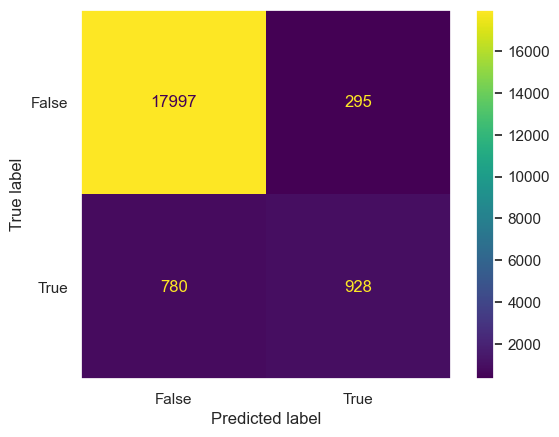

In [66]:
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [67]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 17997
False postive: 295
False negative: 780
True postive: 928


**Roc-AUC Curve**

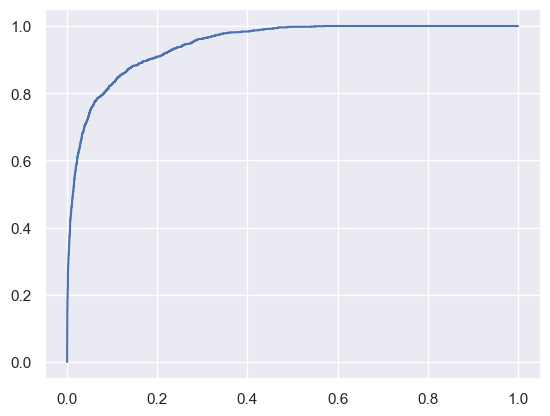

In [68]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Naive Bayes**

In [69]:
from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train,y_train)

GaussianNB()

**Prediction**

In [70]:
y_pred_NB=NBtree.predict(X_test)

**Metrices**

In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

accuray is: 90.69
F1 is: 0.53
Precision is: 0.47
Recall is: 0.61


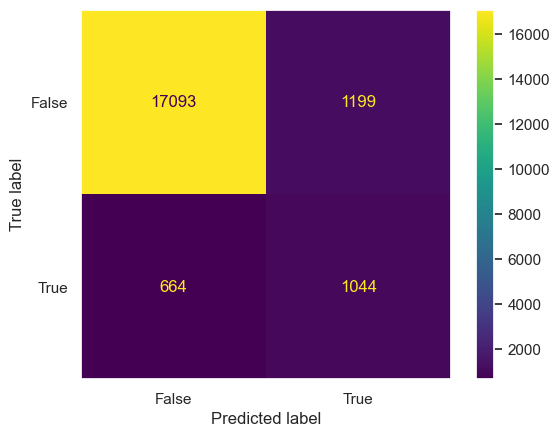

In [72]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [73]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 17093
False postive: 1199
False negative: 664
True postive: 1044


**ROC AUC Curve**

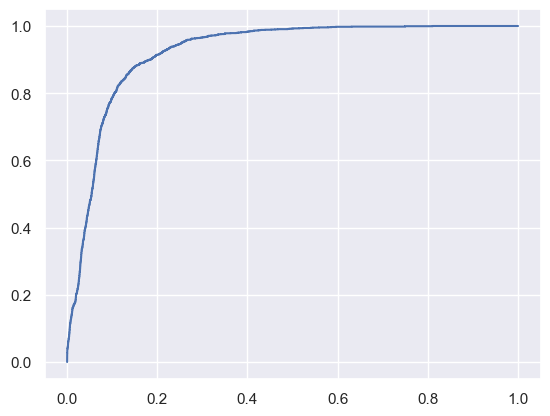

In [74]:
y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()


**KNN**

In [75]:
from sklearn.neighbors import KNeighborsClassifier
KNNtree=KNeighborsClassifier()
KNNtree.fit(X_train, y_train)

KNeighborsClassifier()

**Prediction**

In [76]:
y_pred_KNN=KNNtree.predict(X_test)

**Metrices**

In [77]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

accuray is: 95.3
F1 is: 0.65
Precision is: 0.88
Recall is: 0.52


**Confusion Metrices**

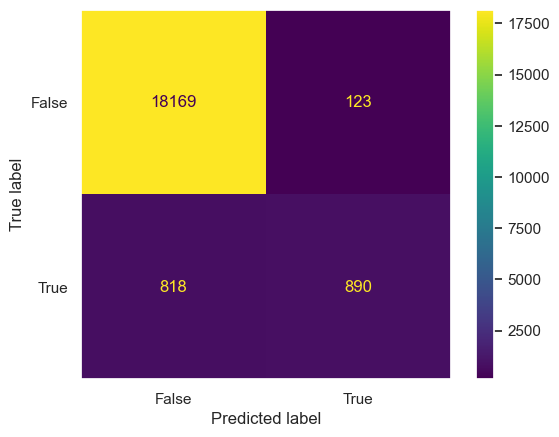

In [78]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_KNN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [79]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)



True negative: 18169
False postive: 123
False negative: 818
True postive: 890


**ROC-AUC CURVE**

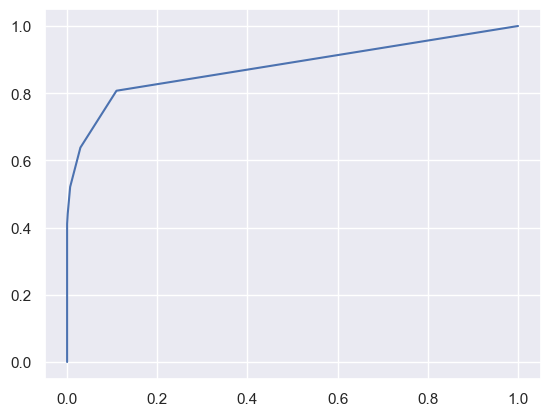

In [80]:
y_KNN_pred_prob=KNNtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Random Forest**

In [81]:
from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train, y_train)


RandomForestClassifier()

**Prdiction**

In [82]:
y_pred_RF=RFtree.predict(X_test)

**Metrices**

In [83]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 96.99
F1 is: 0.8
Precision is: 0.94
Recall is: 0.69


**Confusion Metrics**

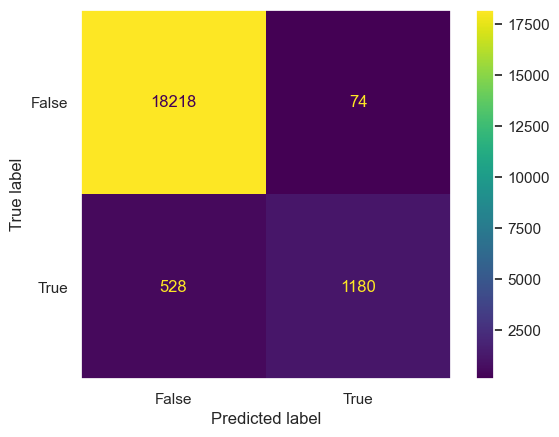

In [84]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


In [85]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18218
False postive: 74
False negative: 528
True postive: 1180


**ROC-AUC Curve**

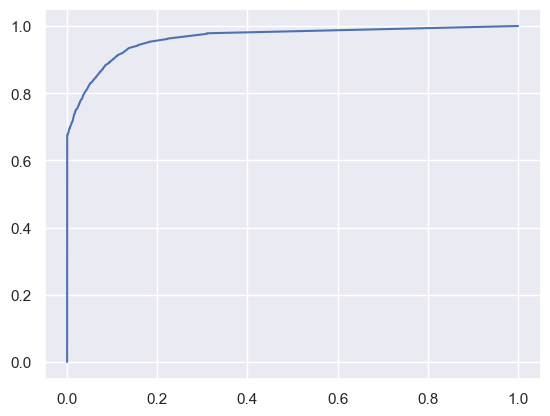

In [86]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Gradient Boosting**

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(X_train, y_train)


GradientBoostingClassifier()

**Prediction**

In [88]:
y_pred_GB=RFtree.predict(X_test)


**Metrices**

In [89]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_GB= round(accuracy_score(y_test,y_pred_GB)*100,2)
f1_GB=round(f1_score(y_test,y_pred_GB),2)
precision_GB=round(precision_score(y_test,y_pred_GB),2)
recall_GB=round(recall_score(y_test,y_pred_GB),2)
print("accuray is:",acc_GB)
print("F1 is:",f1_GB)
print("Precision is:",precision_GB)
print("Recall is:",recall_GB)


accuray is: 96.99
F1 is: 0.8
Precision is: 0.94
Recall is: 0.69


**Confusion Metrices**

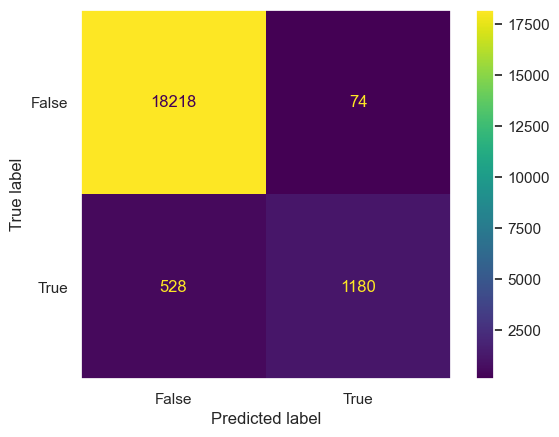

In [90]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_GB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [91]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_GB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18218
False postive: 74
False negative: 528
True postive: 1180


**ROC-AUC Curve**

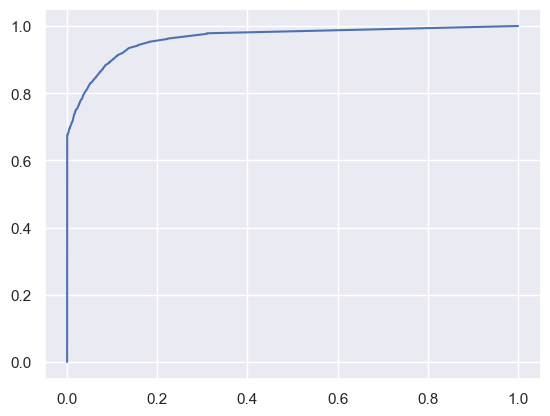

In [92]:
y_GB_pred_prob=GB.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Comparing which model is best**

In [93]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF,acc_GB],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF,precision_GB],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF,recall_GB],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF,f1_GB]}

pd.DataFrame(dict1,index=['Decision Tree','K Nearest Neighbour','Logistic regression','Naive Bayes','Random Forest','Gradient Boosting'])

,Accuracy,Precision,Recall,F1-score
Decision Tree,95.18,0.71,0.73,0.72
K Nearest Neighbour,95.30,0.88,0.52,0.65
Logistic regression,94.62,0.76,0.54,0.63
Naive Bayes,90.69,0.47,0.61,0.53
Random Forest,96.99,0.94,0.69,0.80
Gradient Boosting,96.99,0.94,0.69,0.80


## Model Developement With Hyperparameter Tunning

In [94]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_tree=DecisionTreeClassifier()
grid_tree

DecisionTreeClassifier()

In [95]:
grid_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [96]:
param_grid={
     "criterion":['gini','entropy'],
    "max_depth":[1,2,3,4,5,6],
    "min_samples_split":[1,2,3],
    "min_samples_leaf":[2,3,4,5],
    "random_state":[0,42]
}
    


In [97]:
import time
start = time.time()
grid_search = GridSearchCV(grid_tree,
                          param_grid,
                          scoring='accuracy',
                          cv=5,
                          verbose=True)
end= time.time()
print("Te total time taken is:",(end-start))

Te total time taken is: 0.0


In [98]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [99]:
import time
start=time.time()
grid_search.fit(X_train,y_train)
end=time.time()
print("The total time taken is :",(end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
The total time taken is : 80.37215065956116


In [100]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=0)

In [101]:
grid_search.best_score_

0.9718

In [102]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 0}

In [103]:
grid_search.best_index_

26

**Developing Decision Tree with best parameter**

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',
                            max_depth=2,
                            min_samples_leaf=2,
                            min_samples_split=2,
                            random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=0)

**prediction**

In [105]:
y_pred_dt=dtree.predict(X_test)

**Metrics**

In [106]:
acc_dt=round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

accuray is: 97.21
F1 is: 0.81
Precision is: 1.0
Recall is: 0.67
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



**confusion Metrics**

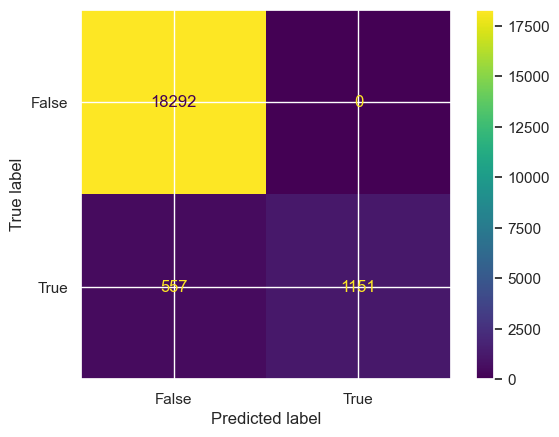

In [107]:
cmt=confusion_matrix(y_test,y_pred_dt)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(True)
plt.show()

In [108]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18292
False postive: 0
False negative: 557
True postive: 1151


**ROC-AUC Curve**

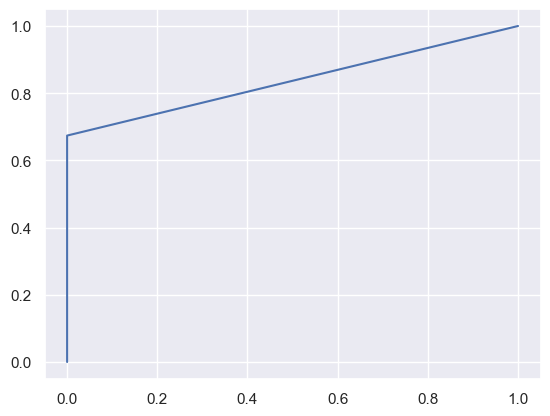

In [109]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob)
plt.plot(fpr,tpr)
plt.show()

In [110]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
f1 = imp_df.sort_values(by="Importance", ascending=False)
f1

,Feature Name,Importance
6,HbA1c_level,0.672235
7,blood_glucose_level,0.327765
0,gender,0.000000
1,age,0.000000
2,hypertension,0.000000
3,heart_disease,0.000000
4,smoking_history,0.000000
5,bmi,0.000000


**Random Forest**

In [111]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF

RandomForestClassifier()

In [112]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_RF=RandomForestClassifier()
RF_params=[keys for keys in grid_RF.get_params()]
print("available parameters for model :",RF_params)

available parameters for model : ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']


**create a dictionary**

In [113]:
param_grid = {
    'n_estimators': [100, 200],
    "criterion":['gini','entropy'],
    'max_depth': [ 5, 10],
    'max_features': ['sqrt', 'log2'],
    'random_state': [0, 42]
}

**Apply the Grid Search**

In [114]:
import time
start=time.time()
grid_search.fit(X_train,y_train)
end=time.time()
print("The total time taken is :",(end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
The total time taken is : 82.30201435089111


**Get The best parameter**

In [115]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 0}

In [116]:
grid_search.best_index_

26

In [117]:
grid_search.best_score_

0.9718

In [118]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=0)

**Deploy the model with best parameter**

In [119]:
from sklearn.ensemble import RandomForestClassifier
RFTree=RandomForestClassifier(criterion='gini',
                              max_depth= 2,
                              max_features='sqrt',
                              n_estimators=100,
                              random_state=0)
RFTree.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

**prediction**

In [120]:
y_pred_RF=RFtree.predict(X_test)

**metrics**

In [121]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report
acc_RF=round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

accuray is: 96.99
F1 is: 0.8
Precision is: 0.94
Recall is: 0.69


**confusion Metrices**

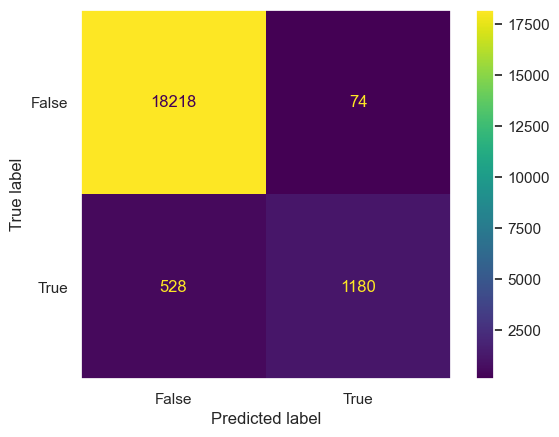

In [122]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [123]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18218
False postive: 74
False negative: 528
True postive: 1180


**ROC AUC Curve**

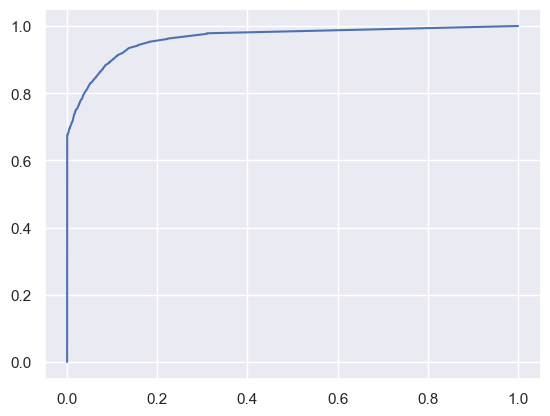

In [124]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**KNN**

In [125]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_KNN=KNeighborsClassifier()
KNN_params=[keys for keys in grid_KNN.get_params()]
print("Parameter are:",KNN_params)

Parameter are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']


**Creating a Dictionary**

In [126]:
param_grid={
    'n_neighbors':[6,7,8,12],
    'leaf_size':[30,40,50,70],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

**Apply the grid**

In [127]:
grid_search = GridSearchCV(grid_KNN,  
                           param_grid, 
                           scoring='accuracy', 
                           cv=5,
                          verbose=True)

**Fit the model with train data**

In [128]:

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50, 70],
                         'n_neighbors': [6, 7, 8, 12]},
             scoring='accuracy', verbose=True)

**Get The Best Parameter**

In [129]:
grid_search.best_index_

1

In [130]:
grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 7}

In [131]:
grid_search.best_score_


0.95305

In [132]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=7)

**Developing the KNN model with best parameter**

In [134]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(algorithm='auto', leaf_size= 30, n_neighbors= 7)
KN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

**Prediction**

In [135]:
y_pred_KN=KN.predict(X_test)

In [136]:
acc_KN= round(accuracy_score(y_test,y_pred_KN)*100,2)
f1_KN=round(f1_score(y_test,y_pred_KN),2)
precision_KN=round(precision_score(y_test,y_pred_KN),2)
recall_KN=round(recall_score(y_test,y_pred_KN),2)

print("accuray is:",acc_KN)
print("F1 is:",f1_KN)
print("Precision is:",precision_KN)
print("Recall is:",recall_KN)
print(classification_report(y_test,y_pred_KN))

accuray is: 95.24
F1 is: 0.64
Precision is: 0.9
Recall is: 0.5
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18292
           1       0.90      0.50      0.64      1708

    accuracy                           0.95     20000
   macro avg       0.93      0.75      0.81     20000
weighted avg       0.95      0.95      0.95     20000



**Confusion Metrics**

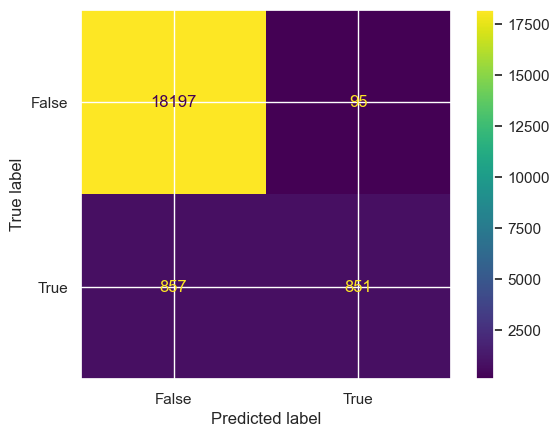

In [137]:
cmt=confusion_matrix(y_test,y_pred_KN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [138]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18197
False postive: 95
False negative: 857
True postive: 851


**ROC AUC Curve**

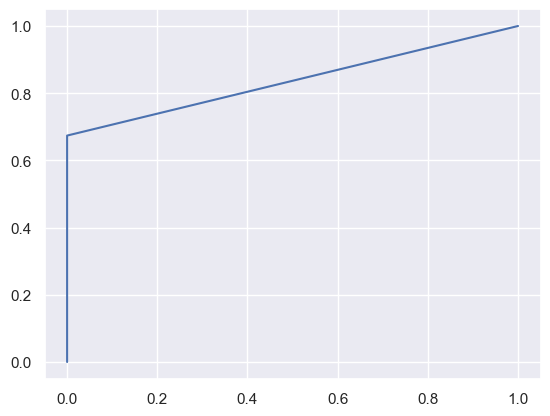

In [139]:
y_KN_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KN_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

#### NAive Bayes

In [140]:
from sklearn.model_selection import GridSearchCV,cross_val_score
NB=GaussianNB()
NB

GaussianNB()

In [141]:
NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [142]:
NB_params=[keys for keys in NB.get_params()]
NB_params

['priors', 'var_smoothing']

**Create A Dictionary**

In [143]:
param_grid={
    'priors': [None, 'entropy'],
    'var_smoothing':[0.005]
}

In [144]:
grid_search = GridSearchCV(NB,  
                           param_grid, # params 
                           scoring='accuracy',
                           cv=4,
                          verbose=True) # cross validation

In [145]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


GridSearchCV(cv=4, estimator=GaussianNB(),
             param_grid={'priors': [None, 'entropy'], 'var_smoothing': [0.005]},
             scoring='accuracy', verbose=True)

**Get The Best Parameter**

In [146]:
grid_search.best_index_

0

In [147]:
grid_search.best_params_

{'priors': None, 'var_smoothing': 0.005}

In [148]:
grid_search.best_estimator_

GaussianNB(var_smoothing=0.005)

**Developing the Model Naive Bayes With Best Parameter**

In [149]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB(priors=None, var_smoothing= 0.005)
NB.fit(X_train,y_train)

GaussianNB(var_smoothing=0.005)

**Prediction**

In [150]:
y_pred_NB=NB.predict(X_test)

**Metrices**

In [151]:
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)

print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)
print(classification_report(y_test,y_pred_NB))

accuray is: 94.03
F1 is: 0.55
Precision is: 0.77
Recall is: 0.43
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18292
           1       0.77      0.43      0.55      1708

    accuracy                           0.94     20000
   macro avg       0.86      0.71      0.76     20000
weighted avg       0.93      0.94      0.93     20000



**Confusion Metrices**

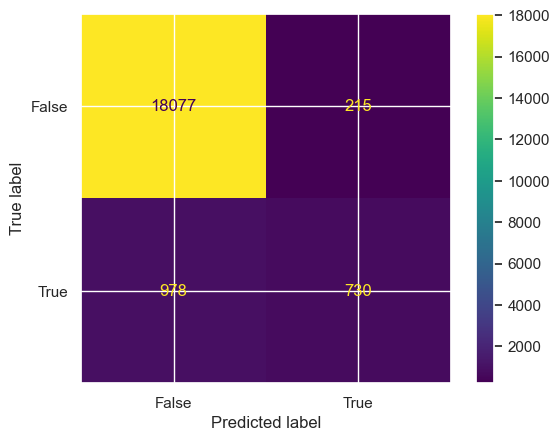

In [152]:
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [153]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18077
False postive: 215
False negative: 978
True postive: 730


**ROC AUC Curve**

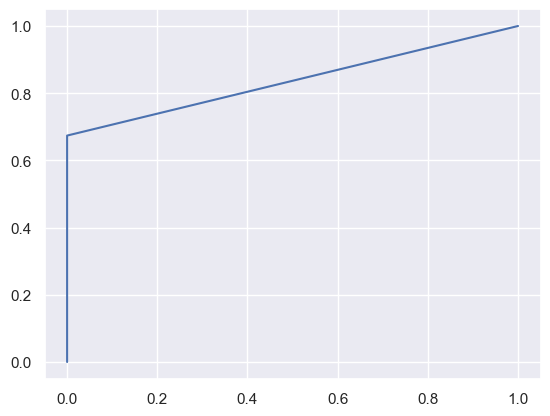

In [154]:
y_NB_pred_prob=dtree.predict_proba(X_test)[:,1]   
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

**Logistic Regression**

In [155]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_log=LogisticRegression()
grid_log

LogisticRegression()

In [156]:
log_params=[keys for keys in grid_log.get_params()]
log_params

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

In [157]:
grid_log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

**Create a Dictionary**

In [158]:
log_grid={
    'C':[1.0,'entropy'],
    'intercept_scaling':[4,6,7,8,9,10],
    'fit_intercept':[True],
    'warm_start':[False],
    'max_iter':[0,42]
         
}

In [159]:
grid_search = GridSearchCV(grid_log,  # Base modl
                           log_grid, # params 
                           scoring='accuracy', # metric
                           cv=4,
                          verbose=True)

In [160]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 'entropy'], 'fit_intercept': [True],
                         'intercept_scaling': [4, 6, 7, 8, 9, 10],
                         'max_iter': [0, 42], 'warm_start': [False]},
             scoring='accuracy', verbose=True)

**Get The Best parameters**

In [161]:
grid_search.best_index_

1

In [162]:
grid_search.best_params_

{'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 4,
 'max_iter': 42,
 'warm_start': False}

In [163]:
grid_search.best_score_

0.9262250000000001

In [164]:
grid_search.best_estimator_

LogisticRegression(intercept_scaling=4, max_iter=42)

**Developing Logistic With Best Parameter**

In [165]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C= 1.0,
                       fit_intercept= True,
                       intercept_scaling= 4,
                       max_iter=42,
                       warm_start= False)
log.fit(X_train,y_train)

LogisticRegression(intercept_scaling=4, max_iter=42)

**Prediction**

In [166]:
y_pred_log=log.predict(X_test)

**Metrices**

In [167]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 92.33
F1 is: 0.34
Precision is: 0.64
Recall is: 0.23


**Confusion Metrics**

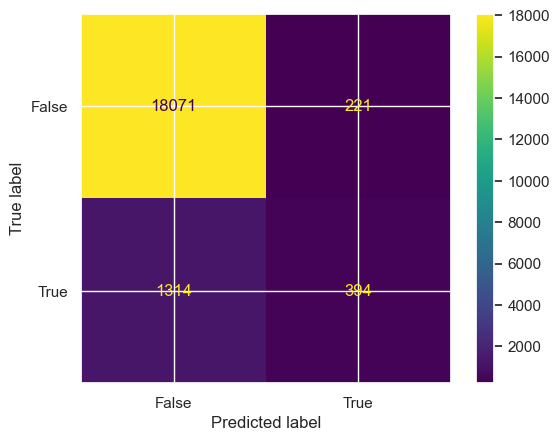

In [168]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [169]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18071
False postive: 221
False negative: 1314
True postive: 394


**ROC AUC Curve**

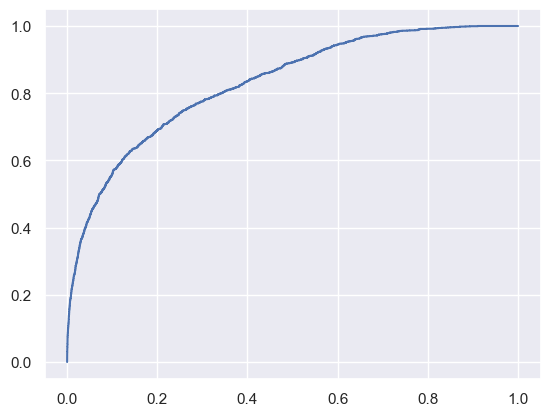

In [170]:
y_log_pred_prob=log.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**Gradient Boosting**

In [171]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_GB=GradientBoostingClassifier()
grid_GB

GradientBoostingClassifier()

In [172]:
grid_GB.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [173]:
param_GB={
    'max_depth':[3,4,5,6],
    'min_samples_leaf':[3,4,5,6],
    'warm_start': [False],
    'min_samples_split': [2,3,5,7],
    'verbose':[0]
}

In [174]:
import time
start=time.time()
grid_search5=GridSearchCV(grid_GB,param_GB,scoring='accuracy',cv=5,verbose=True)
end=time.time()
print('The total time required is :',(end-start))

The total time required is : 0.0


In [175]:
grid_search5

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [2, 3, 5, 7], 'verbose': [0],
                         'warm_start': [False]},
             scoring='accuracy', verbose=True)

In [176]:
import time
start=time.time()
grid_search5.fit(X_train,y_train)
print('The total time required is :',(end-start))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
The total time required is : -181.2664442062378


In [177]:
grid_search5.best_estimator_

GradientBoostingClassifier(min_samples_leaf=6)

In [178]:
grid_search5.best_score_

0.9717625000000002

In [179]:
grid_search5.best_index_

12

In [180]:
grid_search5.best_params_

{'max_depth': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'verbose': 0,
 'warm_start': False}

**Developing Model with best parameter**

In [181]:
from sklearn.ensemble import GradientBoostingClassifier
GBB=GradientBoostingClassifier(
    max_depth=3,
    min_samples_leaf= 6,
    min_samples_split=2,
    verbose=0,
    warm_start=False
)

GBB.fit(X_train,y_train)

GradientBoostingClassifier(min_samples_leaf=6)

In [182]:
y_pred_GBB=GBB.predict(X_test)

In [183]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_GBB= round(accuracy_score(y_test,y_pred_GBB)*100,2)
f1_GBB=round(f1_score(y_test,y_pred_GBB),2)
precision_GBB=round(precision_score(y_test,y_pred_GBB),2)
recall_GBB=round(recall_score(y_test,y_pred_GBB),2)

print("accuray is:",acc_GBB)
print("F1 is:",f1_GBB)
print("Precision is:",precision_GBB)
print("Recall is:",recall_GBB)

accuray is: 97.23
F1 is: 0.81
Precision is: 0.99
Recall is: 0.68


**Confusion Metrics**

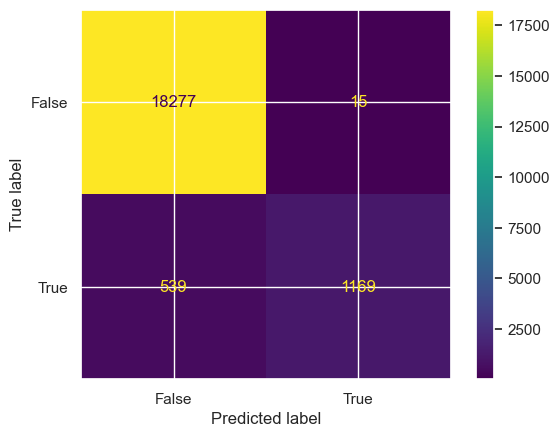

In [184]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_GBB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

In [185]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_GBB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

True negative: 18277
False postive: 15
False negative: 539
True postive: 1169


**ROC-AUC CURVE**

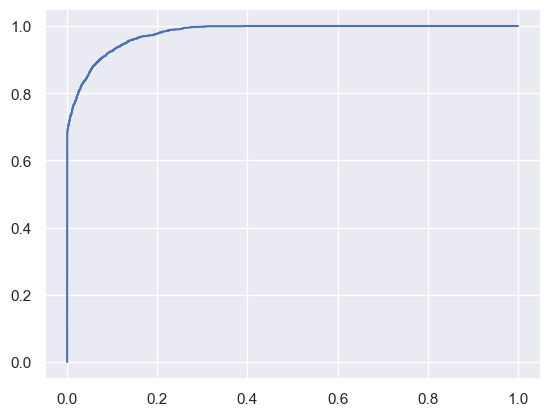

In [186]:
y_GBB_pred_prob=GBB.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_GBB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [188]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF,acc_GBB],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF,precision_GBB],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF,recall_GBB],
    "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF,f1_GBB]}

pd.DataFrame(dict1,index=['Decision Tree','K nearest Neighbour','Logistic Regression ','Naive Bayes','Random Forest','Gradient boosting'])

,Accuracy,Precision,Recall,F1-score
Decision Tree,97.21,1.00,0.67,0.81
K nearest Neighbour,95.30,0.88,0.52,0.65
Logistic Regression,92.33,0.64,0.23,0.34
Naive Bayes,94.03,0.77,0.43,0.55
Random Forest,96.99,0.94,0.69,0.80
Gradient boosting,97.23,0.99,0.68,0.81


In [210]:
import pickle
pickle.dump(GBB,open("Diabetic_best.pkl",'wb'))

In [211]:
y_pred_GBB

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [5]:
test_df=pd.read_csv(r'test')
#test_df

In [9]:
test_df=test_df.drop('Unnamed: 0',axis=1)

In [10]:
import pickle
GBtree = pickle.load(open("Diabetic_best.pkl",'rb'))

In [11]:
y_pred = GBtree.predict(test_df)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)